In [8]:
using Pkg
Pkg.add(PackageSpec(name="JWAS",rev="v0.9.0"))
#Pkg.add("RecipesBase")
#using RecipesBase

  Updating git-repo `https://github.com/reworkhow/JWAS.jl.git`
 Resolving package versions...
  Updating `/opt/julia/environments/v1.1/Project.toml`
  [c9a035f4] ↑ JWAS v0.6.0 #20c1553 (https://github.com/reworkhow/JWAS.jl.git) ⇒ v0.9.0 #a154aeb (https://github.com/reworkhow/JWAS.jl.git)
  Updating `/opt/julia/environments/v1.1/Manifest.toml`
  [c9a035f4] ↑ JWAS v0.6.0 #20c1553 (https://github.com/reworkhow/JWAS.jl.git) ⇒ v0.9.0 #a154aeb (https://github.com/reworkhow/JWAS.jl.git)


In [6]:
Pkg.status("JWAS")

    Status `/opt/julia/environments/v1.1/Project.toml`
  [c9a035f4] JWAS v0.6.0 #20c1553 (https://github.com/reworkhow/JWAS.jl.git)


In [ ]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [10]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [11]:
phenotypes= dropmissing(phenotypes, :FinPenBatch)
phenotypes

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,false,1B_D02,1B_D02


In [12]:
ADFI_model_equations = "ADFI = intercept + Batch + Died + EntryAge + FinPenBatch + SowID"
ADFI_R=0.491671E-01
ADFI_model=build_model(ADFI_model_equations,ADFI_R);

In [13]:
set_covariate(ADFI_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [14]:
ADFI_G1=0.569986E-02
set_random(ADFI_model,"FinPenBatch",ADFI_G1)

In [15]:
ADFI_G2=0.360955E-02
set_random(ADFI_model,"SowID",ADFI_G2)

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 24.958094 seconds (37.77 k allocations: 10.393 GiB, 0.09% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [17]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [18]:
ADFI_G3=0.288430E-01
@time add_genotypes(ADFI_model,M,ADFI_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
  8.154287 seconds (4.31 M allocations: 21.012 GiB, 2.88% gc time)


In [12]:
@time ADFI_outCPi=runMCMC(ADFI_model,phenotypes,methods="BayesC", missing_phenotypes=true, estimatePi=false,estimateScale=true,chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0058 in the row 54 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0065 in the row 59 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0084 in the row 78 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0086 in the row 80 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0098 in the row 89 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0101 in the row 91 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0108 in the row 98 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual

running MCMC ...100%|███████████████████████████████████| Time: 5:30:18


ErrorException: type Genotypes has no field meanScaleVar

In [13]:
keys(ADFI_outCPi)

UndefVarError: UndefVarError: ADFI_outCPi not defined

In [14]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

0.02050602929462501

In [15]:
Sow=CSV.read("MCMC_samples_SowID_variances.txt",delim = ' ',header=true)
Vs=mean(Sow[!, 1])

0.004254548480858814

In [16]:
pen=CSV.read("MCMC_samples_FinPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

0.0025800722112114846

In [17]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

0.05573206314044709

In [18]:
h2=Va/(Va+Vs+Ve)

0.26016882512617484

In [18]:
Pi=ADFI_outCPi["Pi"]

,π,Estimate,Std_Error
,Any,Any,Any
1,π,0.988988,0.0151926


In [24]:
Pi=CSV.read("MCMC_samples_pi.txt",delim = ' ',header=false)
insertcols!(Pi, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Column1
,Int64,Float64
1,1,0.989549
2,2,0.991203
3,3,0.991483
4,4,0.992245
5,5,0.992705
6,6,0.994845
7,7,0.995283
8,8,0.998019
9,9,0.998236


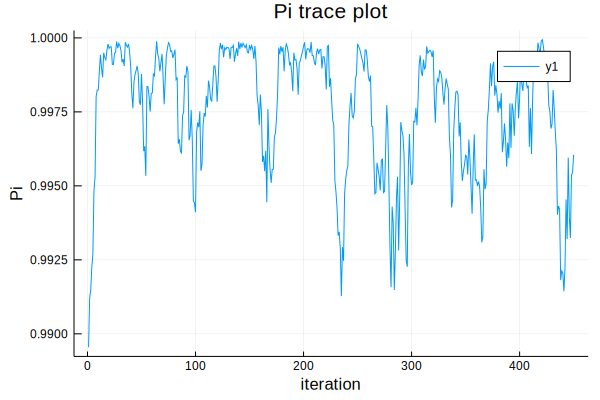

In [25]:
using Plots
x = Pi[!,1]; y = Pi[!,2]; # These are the plotting data
plot(x,y, title = "Pi trace plot",
        xlabel = "iteration", ylabel = "Pi")

In [19]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,ADFI
,Int64,Float64
1,1,0.114405
2,2,0.114031
3,3,0.129403
4,4,0.120854
5,5,0.194701
6,6,0.147831
7,7,0.122831
8,8,0.129074
9,9,0.121954


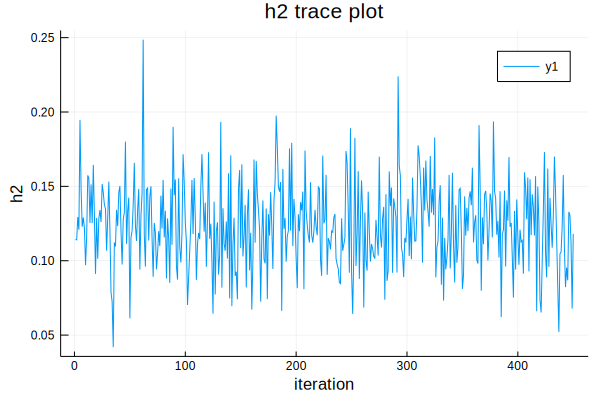

In [20]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [50]:
ADFI_model_equations = "ADFI = intercept + Batch + Died + EntryAge + FinPenBatch + SowID"
ADFI_R=0.05573206314044709
ADFI_model=build_model(ADFI_model_equations,ADFI_R);

In [51]:
set_covariate(ADFI_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [52]:
ADFI_G1=0.0025800722112114846
set_random(ADFI_model,"FinPenBatch",ADFI_G1)

In [53]:
ADFI_G2=0.004254548480858814
set_random(ADFI_model,"SowID",ADFI_G2)

In [54]:
ADFI_G3=0.02050602929462501
@time add_genotypes(ADFI_model,M,ADFI_G3,header=true, rowID=rowID)

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
  7.268726 seconds (870.68 k allocations: 20.848 GiB, 1.38% gc time)


In [55]:
@time ADFI_outB=runMCMC(ADFI_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.9, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)


The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 1.0e-6



A Linear Mixed Model was build using model equations:

ADFI = intercept + Batch + Died + EntryAge + FinPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
Died            factor       fixed                2
EntryAge        covariate    fixed                1
FinPenBatch     factor       random             261
SowID           factor       random            1100

MCMC Information:

methods                                      BayesB
                              complete genomic data
                   (i.e., non-single-step analysis)
chain_length                                  50000
burnin                                         5000
estimatePi                                    false
estimateS

running MCMC for BayesB...100%|█████████████████████████| Time: 11:46:55




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


42431.078567 seconds (112.40 G allocations: 2.396 TiB, 0.90% gc time)


Dict{Any,Any} with 8 entries:
  "marker effects"          => 435172×5 DataFrame…
  "EBV_ADFI"                => 3205×3 DataFrame…
  "heritability"            => 1×3 DataFrame…
  "location parameters"     => 1415×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "genetic_variance"        => 1×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…

In [56]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

0.01592004912661847

In [57]:
Sow=CSV.read("MCMC_samples_SowID_variances.txt",delim = ' ',header=true)
Vs=mean(Sow[!, 1])

0.004268771832912233

In [58]:
pen=CSV.read("MCMC_samples_FinPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

0.0017481231485765476

In [59]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

0.10047017788902875

In [60]:
h2=Va/(Va+Vs+Ve)

0.13475767271582903

In [61]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,ADFI
,Int64,Float64
1,1,0.152944
2,2,0.150819
3,3,0.154763
4,4,0.151924
5,5,0.165101
6,6,0.159543
7,7,0.153591
8,8,0.160191
9,9,0.153181


In [63]:
using Pkg
Pkg.build("GR")

  Building MbedTLS → `/opt/julia/packages/MbedTLS/X4xar/deps/build.log`
  Building GR ─────→ `/opt/julia/packages/GR/Atztx/deps/build.log`


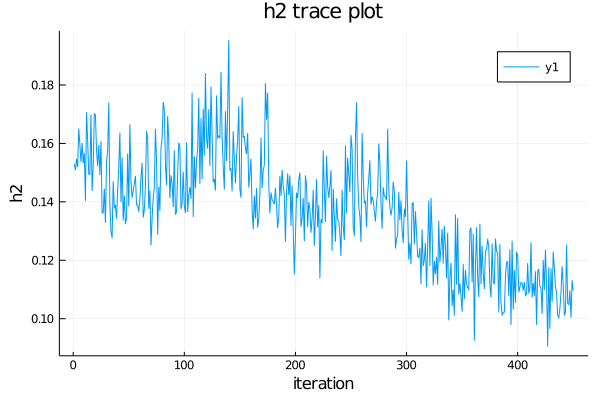

In [64]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [ ]:
@time ADFI_outB,ADFI_winVarProps = GWAS("MCMC_samples_marker_effects_ADFI.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


In [27]:
sort(ADFI_outB, :prGenVar, rev=true)

,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,prGenVar,WPPA
,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,1061,7,93000000,94000000,93000355,93980818,228,1.57,0.433333
2,118,1,117000000,118000000,117001841,117988311,182,0.36,0.257778
3,1018,7,50000000,51000000,50001617,50996708,251,0.33,0.377778
4,990,7,22000000,23000000,22003711,22970603,188,0.32,0.215556
5,2183,17,30000000,31000000,30002660,30993815,252,0.31,0.244444
6,119,1,118000000,119000000,118001042,118999237,107,0.31,0.208889
7,120,1,119000000,120000000,119009467,119998335,128,0.28,0.202222
8,2076,16,3000000,4000000,3001996,3998921,245,0.27,0.257778
9,162,1,161000000,162000000,161005018,161999307,223,0.24,0.231111


In [28]:
sum(ADFI_outB[!, 8])

99.01000000000005

In [ ]:
CSV.write("MCMC_samples_1Mb_window_VarProps_ADFI.txt", ADFI_outB)

In [ ]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [ ]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [ ]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [ ]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [ ]:
#ppa[1, [261 755 1352 2185]]

In [ ]:
#sort(vec(ppa))